In [1]:
from google.colab import drive
drive.mount("/content/drive")

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import pandas as pd
obesity_df = pd.read_csv("/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/ObesityDataSet_Labeled_merge.csv")
obesity_df.head(10)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,2,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,2,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,2,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,2,3,28.342381
5,1,29.0,1.62,53.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,1,20.195092
6,0,23.0,1.50,55.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,1,1,24.444444
7,1,22.0,1.64,53.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,2,1,19.705532
8,1,24.0,1.78,64.0,1,1,3.0,3.0,1,0,2.0,0,1.0,1.0,2,2,1,20.199470
9,1,22.0,1.72,68.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,0,2,1,22.985398


In [3]:
change_NObeyesdad_value_dict = {
    0: 0,
    1: 1,
    2 : 2,
    3 : 2,
    4 : 3,
    5 : 4,
    6 : 5
}
obesity_df = obesity_df.replace({'NObeyesdad': change_NObeyesdad_value_dict})
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,2,1,24.386526
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,2,1,24.238227
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,2,1,23.765432
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,3,2,26.851852
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,2,2,28.342381


In [4]:
print(obesity_df['NObeyesdad'].value_counts())

2    580
3    351
5    324
4    297
1    287
0    272
Name: NObeyesdad, dtype: int64


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()
original_labeled_Scaled = obesity_df
cont_vars = ['Age', 'Height', 'Weight']
ordinal_vars = ['CALC', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
original_labeled_Scaled[cont_vars] = std_scaler.fit_transform(original_labeled_Scaled[cont_vars])
original_labeled_Scaled[ordinal_vars] = mm_scaler.fit_transform(original_labeled_Scaled[ordinal_vars])

original_labeled_Scaled.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
count,2111.000000,2111.000000,2.111000e+03,2.111000e+03,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.000000,-5.385449e-16,-5.385449e-16,0.817622,0.883941,0.709522,0.561876,1.140692,0.020843,0.504006,0.045476,0.336766,0.328933,0.243802,1.808148,2.514448,29.700159
std,0.500083,1.000237,1.000237e+00,1.000237e+00,0.386247,0.320371,0.266963,0.259346,0.468543,0.142893,0.306477,0.208395,0.283531,0.304464,0.171833,0.463502,1.580586,8.011337
min,0.000000,-1.625448,-2.698006e+00,-1.817304e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.998685
25%,0.000000,-0.688066,-7.683883e-01,-8.062914e-01,1.000000,1.000000,0.500000,0.552913,1.000000,0.000000,0.292406,0.000000,0.041502,0.000000,0.000000,2.000000,1.000000,24.325802
50%,1.000000,-0.241897,-1.263207e-02,-1.369510e-01,1.000000,1.000000,0.692751,0.666667,1.000000,0.000000,0.500000,0.000000,0.333333,0.312675,0.333333,2.000000,2.000000,28.719089
75%,1.000000,0.265964,7.159595e-01,7.960531e-01,1.000000,1.000000,1.000000,0.666667,1.000000,0.000000,0.738710,0.000000,0.555559,0.500000,0.333333,2.000000,4.000000,36.016501
max,1.000000,5.782584,2.983646e+00,3.300136e+00,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000,50.811753


# GBM

In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Train - Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    original_labeled_Scaled.drop(["BMI", "NObeyesdad", "family_history_with_overweight", "CAEC", "MTRANS"], axis=1),
    original_labeled_Scaled['NObeyesdad'],
    random_state=42,
    stratify=obesity_df['NObeyesdad']
)

X_train

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,FAF,TUE,CALC
1618,1,2.630230,0.518024,1.115943,1,0.500000,0.567174,0,0.071322,0,0.171408,0.000000,0.000000
459,1,-0.837360,0.625225,-0.289710,1,0.500000,0.666667,0,1.000000,0,0.333333,1.000000,0.666667
374,1,-0.994977,0.625225,-0.633419,1,0.500000,1.000000,0,0.500000,0,0.666667,0.500000,0.333333
1400,0,-0.206889,-0.556816,-0.093617,1,0.667237,0.165592,0,0.888362,0,0.260805,0.083864,0.000000
1200,1,1.158524,1.578938,0.470736,1,0.699766,0.541026,0,0.767564,0,0.343584,0.303132,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,-0.364507,0.518024,-0.480660,0,0.500000,0.666667,0,0.500000,0,0.333333,1.000000,0.333333
1140,1,-0.335228,0.888457,0.124141,1,0.489972,0.199821,0,0.500000,0,0.056827,0.409737,0.333333
1927,0,0.265964,-0.552646,0.968251,1,1.000000,0.666667,0,0.885366,0,0.000000,0.062618,0.333333
156,0,1.684523,-1.840398,-1.588165,0,1.000000,0.666667,0,0.000000,0,0.000000,0.500000,0.000000


오차 행렬 : 
[[ 63   5   0   0   0   0]
 [  0  71   1   0   0   0]
 [  0   2 142   1   0   0]
 [  0   0   0  86   2   0]
 [  0   0   0   3  71   0]
 [  0   0   0   0   1  80]]
train 정확도 : 1.0
test 정확도 : 0.9715909090909091
정밀도 : 0.9721450457753651
재현율 : 0.9715909090909091
F1 : 0.971436944055134
Training time: 5.848713159561157 seconds


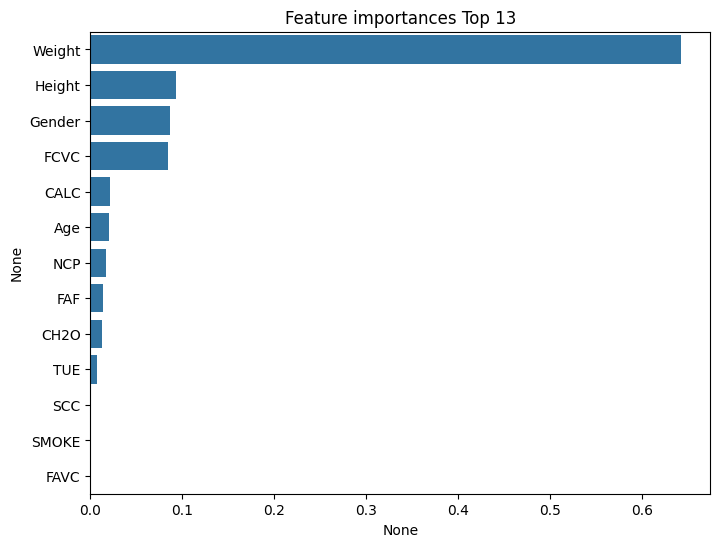

In [9]:
# 디폴트 값 분석

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import time

start_time = time.time()

# 모델 생성
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1
)

# 학습
gb_clf.fit(X_train, y_train)

# 과적합 확인용 train predict생성
gbm_pred_train =  gb_clf.predict(X_train)
gbm_pred_test =  gb_clf.predict(X_test)


# 오차행렬
y_matrix = confusion_matrix(y_test, gbm_pred_test)
print("오차 행렬 : \n{}".format(y_matrix))

accuracy_train = accuracy_score(gbm_pred_train, y_train)
accuracy_test = accuracy_score(gbm_pred_test, y_test)

precision = precision_score(gbm_pred_test, y_test, average='weighted')
recall = recall_score(gbm_pred_test, y_test, average='weighted')
f1 = f1_score(gbm_pred_test, y_test, average='weighted')

print("train 정확도 : {}".format(accuracy_train))
print("test 정확도 : {}".format(accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


# 학습 소요 시간 계산
end_time = time.time()
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# 특성 중요도

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(gb_clf, columns, limit=None):
    ftr_importances_values = gb_clf.feature_importances_
    # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    # 중요도값 순으로 Series를 정렬
    ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
    plt.figure(figsize=(8,6))
    plt.title(f'Feature importances Top {len(columns) if limit is None else limit}')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.show()

# plot_feature_importance 함수 호출
plot_feature_importance(gb_clf, X_train.columns)

## 그리드 서치
한국 데이터와 같이 파라미터 조정 값이 별로 없어서 그리드 서치로 진행

In [10]:
import time
from sklearn.model_selection import GridSearchCV

start_time = time.time()

gb_param_grid={
    'n_estimators' : [50, 100, 500, 1000],
    'learning_rate' : [0.01,0.05, 0.75, 0.1],
}

gb_grid=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

gb_grid.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(gb_grid.best_score_))
print("best param : ",gb_grid.best_params_)

Training time: 292.83620953559875 seconds
best f1_weighted :  0.9651
best param :  {'learning_rate': 0.05, 'n_estimators': 500}


코드만 넣은거기에 아래 그리드서치2부터는 1에서 나온 결과를 확인한 뒤 채워넣기

In [11]:
# 그리드서치2

start_time = time.time()

gb_param_grid={
    'n_estimators' : [400, 500, 600],
    'learning_rate' : [0.03, 0.05, 0.07],
}

gb_grid2=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

gb_grid2.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(gb_grid2.best_score_))
print("best param : ",gb_grid2.best_params_)

Training time: 246.92123174667358 seconds
best f1_weighted :  0.9690
best param :  {'learning_rate': 0.03, 'n_estimators': 500}


In [12]:
# 그리드서치3

start_time = time.time()

gb_param_grid={
    'n_estimators' : [450, 500, 550],
    'learning_rate' : [0.02, 0.03, 0.04],
}

gb_grid3=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_weighted",
    cv=3,
    n_jobs=-1,
)

gb_grid3.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_weighted : {0: .4f}".format(gb_grid3.best_score_))
print("best param : ",gb_grid3.best_params_)

Training time: 283.3670754432678 seconds
best f1_weighted :  0.9690
best param :  {'learning_rate': 0.03, 'n_estimators': 500}


오차 행렬 : 
[[ 64   4   0   0   0   0]
 [  1  71   0   0   0   0]
 [  0   2 142   1   0   0]
 [  0   0   0  86   2   0]
 [  0   0   0   3  71   0]
 [  0   0   0   0   1  80]]
train 정확도 : 1.0
test 정확도 : 0.9734848484848485
정밀도 : 0.9737423981872458
재현율 : 0.9734848484848485
f1_test : 0.9733409440916977
f1_train : 1.0


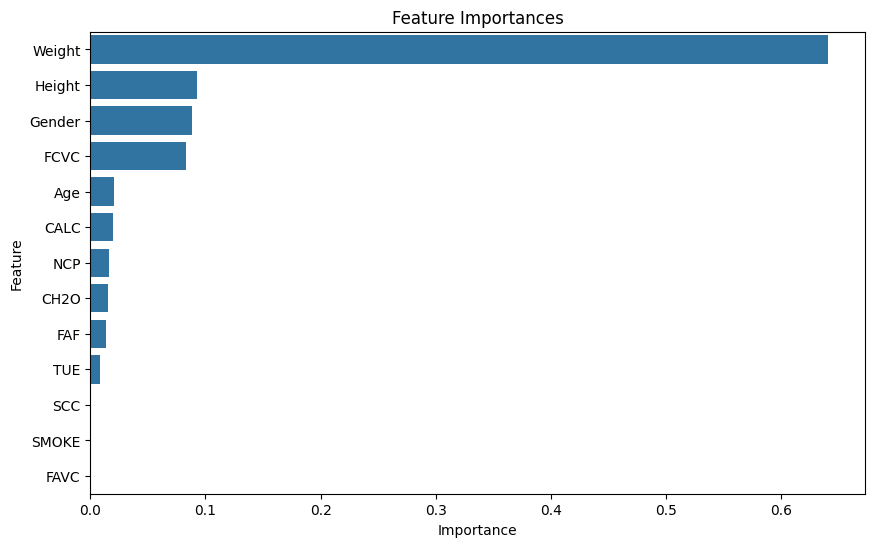

In [13]:
# 최적의 모델 지정
estimator = gb_grid3.best_estimator_
grid_pred_test = estimator.predict(X_test)
grid_pred_train = estimator.predict(X_train)

# 성능 평가
grid_matrix = confusion_matrix(y_test, grid_pred_test)
print("오차 행렬 : \n{}".format(grid_matrix))

# 성능 평가하기
grid_accuracy_test = accuracy_score(grid_pred_test, y_test)
grid_accuracy_train = accuracy_score(grid_pred_train, y_train)

precision = precision_score(grid_pred_test, y_test, average='weighted')
recall = recall_score(grid_pred_test, y_test, average='weighted')
f1_test = f1_score(grid_pred_test, y_test, average='weighted')
f1_train = f1_score(grid_pred_train, y_train, average='weighted')

print("train 정확도 : {}".format(grid_accuracy_train))
print("test 정확도 : {}".format(grid_accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("f1_test : {}".format(f1_test))
print("f1_train : {}".format(f1_train))

# 특성 중요도
def plot_feature_importance(estimator, columns):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    ftr_top = ftr_importances.sort_values(ascending=False)[:]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# 특성 중요도 그리기
plot_feature_importance(estimator, X_test.columns)

결과를 보고 신장을 제외하고 분석할지 말지 다시 고민해보기

# LGBM

In [ ]:
!pip install lightgbm==3.3.2

In [ ]:
import lightgbm
print(lightgbm.__version__)

In [ ]:
import warnings
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

L_train, L_test, l_train, l_test = train_test_split(
    original_labeled_Scaled.drop(["BMI", "NObeyesdad", "family_history_with_overweight", "CAEC", "MTRANS"], axis=1),
    original_labeled_Scaled['NObeyesdad'],
    random_state=42,
    stratify=obesity_df['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

print(L_train.shape, L_valid.shape, L_test.shape)
L_train

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

start_time = time.time()

# LGBMClassifier 모델 생성
lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

# 검증 데이터셋 설정
eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

# 모델 훈련
lgbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',  # 다중 분류에 적합한 평가 지표 선택
    eval_set=eval_sets,
    verbose=True,
)

# 테스트 데이터에 대한 예측 수행
preds_test = lgbm_clf.predict(L_test)
preds_train = lgbm_clf.predict(L_train)

# 오차 행렬 계산
l_matrix = confusion_matrix(l_test, preds_test)
print("오차 행렬 : \n{}".format(l_matrix))

# 정확도 계산
accuracy_test = accuracy_score(l_test, preds_test)
accuracy_train = accuracy_score(l_train, preds_train)

# 정밀도, 재현율, F1 스코어 계산
precision = precision_score(l_test, preds_test, average='weighted')
recall = recall_score(l_test, preds_test, average='weighted')
f1 = f1_score(l_test, preds_test, average='weighted')

print("train 정확도 : {}".format(accuracy_train))
print("test 정확도 : {}".format(accuracy_test))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

## 하이퍼 파라미터

In [ ]:
pip install hyperopt

In [ ]:
!pip install scikit-learn

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)


100%|██████████| 50/50 [02:12<00:00,  2.66s/trial, best loss: -0.9975206510451246]
Best hyperparameters: {'learning_rate': 0.12403495050979028, 'max_depth': 10.0, 'min_child_samples': 60.0, 'n_estimators': 100.0, 'num_leaves': 63.0, 'subsample': 0.9561940067262696}


In [ ]:
# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy = accuracy_score(l_test, final_preds)
precision = precision_score(l_test, final_preds, average='macro')
recall = recall_score(l_test, final_preds, average='macro')
f1 = f1_score(l_test, final_preds, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))